In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM , Embedding,Bidirectional
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
#df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] , axis=1)
#df.columns = ['labels','data']

df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
y = df['b_labels'].values

df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],y,test_size=0.33)

In [13]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Tokenizer

In [17]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

np.quantile : Compute the q-th quantile of the data along the specified axis.

33.0
189


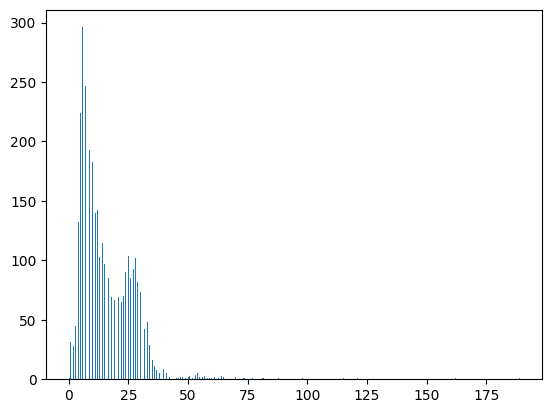

In [20]:
len_all_seq = [len(seq) for seq in sequences_train]
a = plt.hist(len_all_seq,500)
print(np.quantile(len_all_seq,0.95))
print(max(len_all_seq))

In [21]:
word2idx = tokenizer.word_index
v = len(word2idx)
print('Found %s unique tokens.' % v)

Found 7176 unique tokens.


In [22]:
word2idx

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'your': 12,
 'for': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 'that': 19,
 'now': 20,
 'are': 21,
 'but': 22,
 '2': 23,
 'so': 24,
 'not': 25,
 'get': 26,
 'can': 27,
 'or': 28,
 'do': 29,
 'with': 30,
 'will': 31,
 'be': 32,
 "i'm": 33,
 'just': 34,
 'ur': 35,
 'if': 36,
 'at': 37,
 'this': 38,
 'no': 39,
 'we': 40,
 '4': 41,
 'up': 42,
 'how': 43,
 'ok': 44,
 'lt': 45,
 'gt': 46,
 'all': 47,
 'when': 48,
 'free': 49,
 'out': 50,
 'from': 51,
 'go': 52,
 'like': 53,
 'know': 54,
 'good': 55,
 'then': 56,
 'what': 57,
 'come': 58,
 'was': 59,
 'only': 60,
 'its': 61,
 'got': 62,
 'time': 63,
 'am': 64,
 'day': 65,
 'love': 66,
 'he': 67,
 'there': 68,
 'text': 69,
 'want': 70,
 'as': 71,
 'by': 72,
 'send': 73,
 'txt': 74,
 'sorry': 75,
 'one': 76,
 "i'll": 77,
 'lor': 78,
 'about': 79,
 'home': 80,
 'still': 81,
 'da': 82,
 'going': 83,
 'r': 84,
 'k':

In [24]:
train_data = pad_sequences(sequences_train)
print('shape of train data tensor ',train_data.shape)

shape of train data tensor  (3733, 189)


In [29]:
T = train_data.shape[1]
test_data = pad_sequences(sequences_test,maxlen=T)
print('shape of test data tensor',test_data)

shape of test data tensor [[   0    0    0 ...   48 6930 1592]
 [   0    0    0 ...  106    2 1520]
 [   0    0    0 ...   95  173   50]
 ...
 [   0    0    0 ...   13 2352 2353]
 [   0    0    0 ...  120  516   42]
 [   0    0    0 ...    2   58  796]]


### model

In [42]:
#embeding dimensionality
D = 20

#hidden state dimensionality
M = 15


#(v+1) * D

i = Input(shape=(T,))
x = Embedding(v+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 189, 20)           143540    
                                                                 
 lstm_3 (LSTM)               (None, 189, 15)           2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 145,716
Trainable params: 145,716
Non-trainable params: 0
_____________________________________________________

In [45]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('Training model...')
r = model.fit(
    train_data,
    Ytrain,
    epochs = 5,
    validation_data=(test_data,Ytest))

Training model...
Epoch 1/5
117/117 [==============================] - 10s 55ms/step - loss: 0.4487 - accuracy: 0.8663 - val_loss: 0.3753 - val_accuracy: 0.8651
Epoch 2/5
117/117 [==============================] - 6s 51ms/step - loss: 0.3257 - accuracy: 0.8663 - val_loss: 0.2786 - val_accuracy: 0.8651
Epoch 3/5
117/117 [==============================] - 6s 54ms/step - loss: 0.2285 - accuracy: 0.8666 - val_loss: 0.1945 - val_accuracy: 0.8891
Epoch 4/5
117/117 [==============================] - 6s 52ms/step - loss: 0.1418 - accuracy: 0.9697 - val_loss: 0.1282 - val_accuracy: 0.9777
Epoch 5/5
117/117 [==============================] - 6s 52ms/step - loss: 0.0843 - accuracy: 0.9890 - val_loss: 0.0951 - val_accuracy: 0.9777


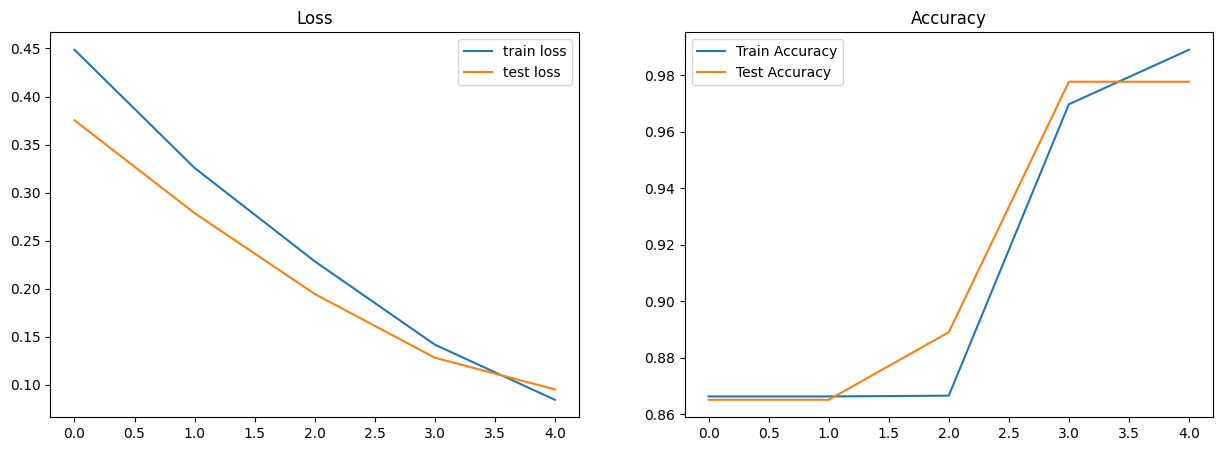

In [46]:
hist = r.history


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Loss')
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(['train loss','test loss'])
plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(['Train Accuracy','Test Accuracy'])

In [47]:
model.evaluate(test_data,Ytest)

58/58 [==============================] - 1s 12ms/step - loss: 0.0951 - accuracy: 0.9777


[0.09510456025600433, 0.9777052998542786]